# Generating Adversarial Images
Author: [Sooham Rafiz](http://github.com/sooham)

## Code and Reproduction

The tensorflow code for my solution is hosted at [[Link](https://github.com/sooham/AdversarialImages)].

My solution is written using __tensorflow r0.11__ which is incompatible with the latest revison, to install:
* Run `pip install -r requirements.txt` to install most dependencies.
* Follow install instructions for [Tensorflow r0.11](https://www.tensorflow.org/versions/r0.11/get_started/os_setup#pip_installation) to install __tensorflow r0.11__.


The files of importance are described below:

* *covnet_model.py*  [[Link](https://github.com/sooham/AdversarialImages/blob/master/covnet_model.py)] implements the CNN architecture.
* _adversarial.py_ [[Link](https://github.com/sooham/AdversarialImages/blob/master/adversarial.py)] implements adversarial image generation on top of the CNN.
* _utils.py_ [[Link](https://github.com/sooham/AdversarialImages/blob/master/utils.py)] contains utility functions.

To train the CNN run `python covnet_model.py`, and launch [Tensorboard](https://www.tensorflow.org/versions/r0.11/how_tos/summaries_and_tensorboard/) to visualize learning with `tensorboard --logdir=logs`. You get the option to save your model in the __save__ directory.

<img src="https://raw.githubusercontent.com/sooham/AdversarialImages/master/img/tensorboard.png" width=700 alt="Training CNN with Tensorboard" style="border: 2px solid #888888; margin-top: 45px; margin-bottom: 45px;">

To generate adversarial images run `python adversarial.py` and input saved model state (or let the default run).
The program will output the training progress and then displays the original image, delta and adversarial image on screen with the option to save.

## Adversarial Image Generation Examples

The plot below shows ten instances of the adversarial image generation algorithm. The left-most column is the _original input image_, the middle is the _delta_ change and finally the right-most is _adversarial image_. For all examples below the adversarial images score $\geq 99.0$ accuracy on the adversarial class, 6.

All examples were trained on a 4 layer CNN classifier.

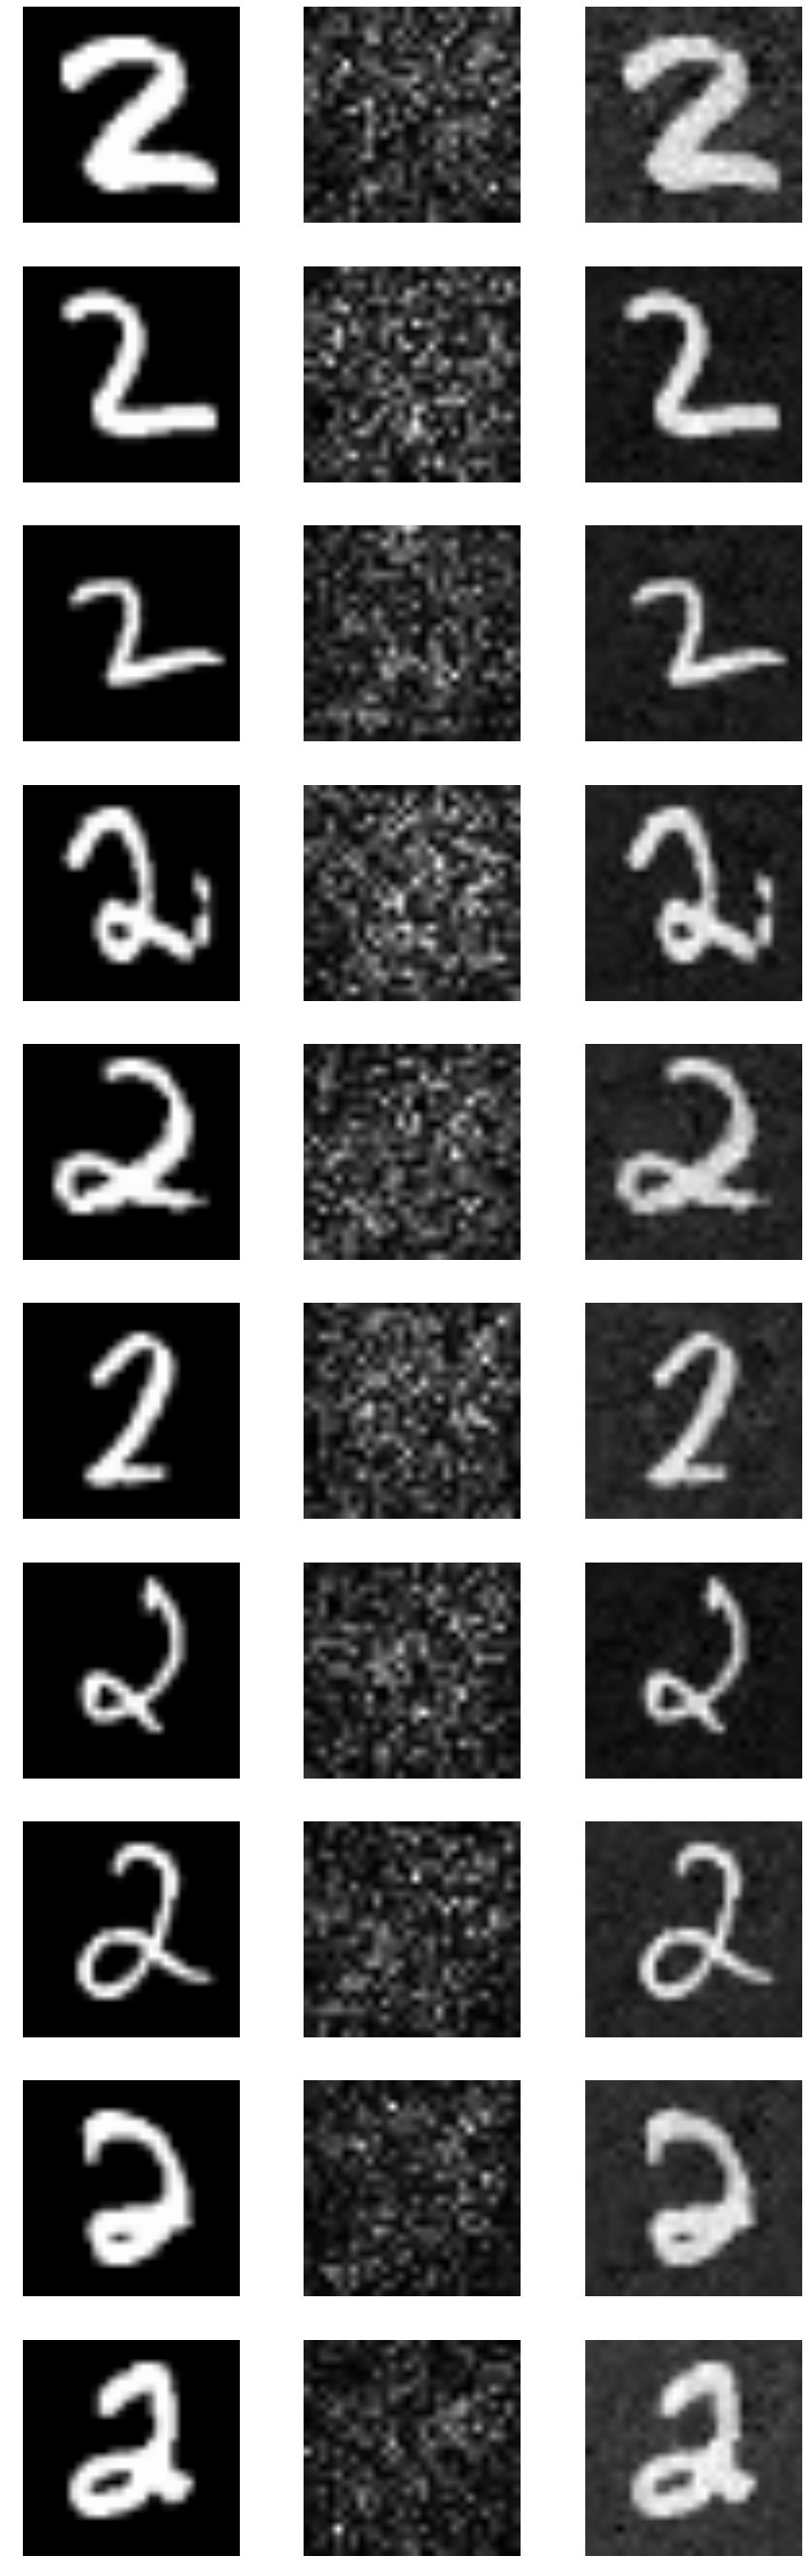

In [1]:
from utils import generate_plot
generate_plot()

## Discussion on Observations

A major observation is that the difference between the _adversarial image_ and the _original image_ is perceptually significant, this is at odds with Andrej Karpathy's remark [[Link](http://karpathy.github.io/2015/03/30/breaking-convnets/)]:
> Somewhat unintuitively, it turns out that you don’t have to change the image too much [to toggle incorrect classification].

Further research into the training phase revealed that adversarial images start to fool the classifier when $\|original - adversarial\|_1 >= 28$; However this L1 norm is only a 3% difference of the maximum possible difference of 784 (784 pixels $\in [0, 1]$). Hence the difference is mathematically negligible, which adds to the conundrum!

The first reason for the perceptual difference can be attributed to the small input size, which does not produce a large $L_1$norm when applies a small epsilon change. This is referenced in Section 3 of _"Explaining and Harnessing Adversarial Examples"_ by Goodfellow et al. [[Link](https://arxiv.org/pdf/1412.6572.pdf)].

> Since $\|\eta\|_{\infty}$ does not grow with the dimensionality of the problem but the change in activation
caused by perturbation by $\eta$ can grow linearly with $n$, then for high dimensional problems, we can
make many infinitesimal changes to the input that add up to one large change to the output.

This means the _delta_ will be smaller for bigger images. 

Another compounding reason is that class features have a low standard deviation centered on zero on the edges of the image, this not only makes any change stand out but also gives our _adversial image_ unlikely a lower liklihood.

## Attribution

* The CNN architecture was modelled after the _Deep MNIST for Experts_ article [[Link](https://www.tensorflow.org/versions/r0.11/tutorials/mnist/pros/)].